### Plot power/load results

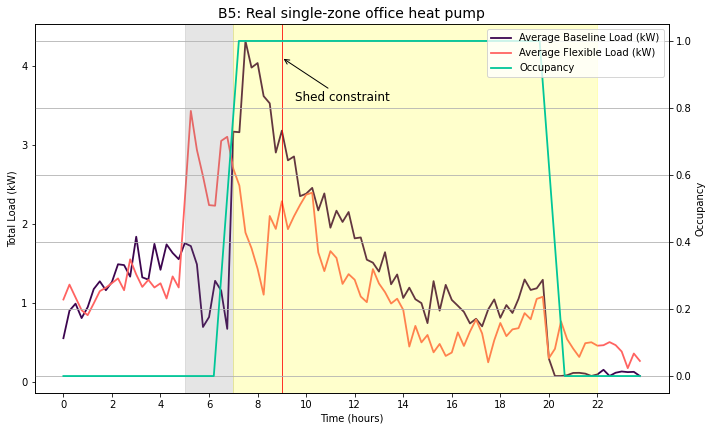

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your CSV file name and path
csv_file = '.csv'
df = pd.read_csv('powerData.csv', index_col='Time', parse_dates=True)
df_schedule = pd.read_csv('scheduleData.csv', index_col='Time', parse_dates=True)

df = df.resample('15T').mean()
df.index = df.index + pd.Timedelta(hours=3)
df['Total'] = df.sum(axis=1)

bs = (df.loc['2023-03-17']['Total'].values + df.loc['2023-03-21']['Total'].values) / 2
dr = (df.loc['2023-03-16']['Total'].values + df.loc['2023-03-22']['Total'].values) / 2

fig = plt.figure(figsize=(10, 6))

baseline_load_line, = plt.plot(np.linspace(0, 23.75, 96), bs / 1000, label="Average Baseline Load (kW)", color='#3c054f', linewidth=1.8)
df_load_line, = plt.plot(np.linspace(0, 23.75, 96), dr / 1000, color='#ff6361', label="Average Flexible Load (kW)", linewidth=1.8)
plt.ylabel('Total Load (kW)')
plt.xlabel('Time (hours)')

# Plot occupancy on secondary y-axis
ax_occ = plt.twinx()
occupancy_line, = ax_occ.plot(np.linspace(0, 23.75, 24), df_schedule['Occupancy'], '#00c698',
                              linestyle='-', linewidth=1.8, label='Occupancy')
ax_occ.set_ylabel('Occupancy')

# Set the zorder of the ax_occ object to place it behind the legend
ax_occ.set_zorder(1)

# Combine the legends
plt.legend(handles=[baseline_load_line, df_load_line, occupancy_line], loc='upper right')

custom_ticks = np.arange(0, 24, 2)  # Generate ticks from 0 to 24 with step 2
plt.xticks(custom_ticks)

# Adding a shaded area for shift between 5:00 to 7:00
plt.axvspan(5, 7, alpha=0.2, color='gray')
# Adding a shaded area for shed between 7:00 to 22:00
plt.axvspan(7, 22, alpha=0.2, color='yellow')

# Adding a line for the 2 hours of shed constraint
plt.axvspan(9, 9.01, alpha=0.8, color='red')

plt.xticks(np.linspace(0, 23.75, 96)[::8])

# Adding a comment with an arrow
plt.annotate('Shed constraint', xy=(9, 0.95), xytext=(11.5, 0.82),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.grid()

plt.title('B5: Real single-zone office heat pump', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.95)

fig.savefig('B5_average_demand.png')
plt.show()


### Plot temperature results

C:\Users\FLAAND\AppData\Local\Temp\ipykernel_27752\2211260242.py:73: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x000001582E9A2340> starts with '_'. It is thus excluded from the legend.
  ax_occ.legend(lines, labels, loc='upper right')
C:\Users\FLAAND\AppData\Local\Temp\ipykernel_27752\2211260242.py:75: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x000001582E9A2340> starts with '_'. It is thus excluded from the legend.
  ax1.legend(lines, labels, loc='upper right')
C:\Users\FLAAND\AppData\Local\Temp\ipykernel_27752\2211260242.py:111: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x000001582E9A2340> starts with '_'. It is thus excluded from the legend.
  ax_occ.legend(lines, labels, loc='upper right')


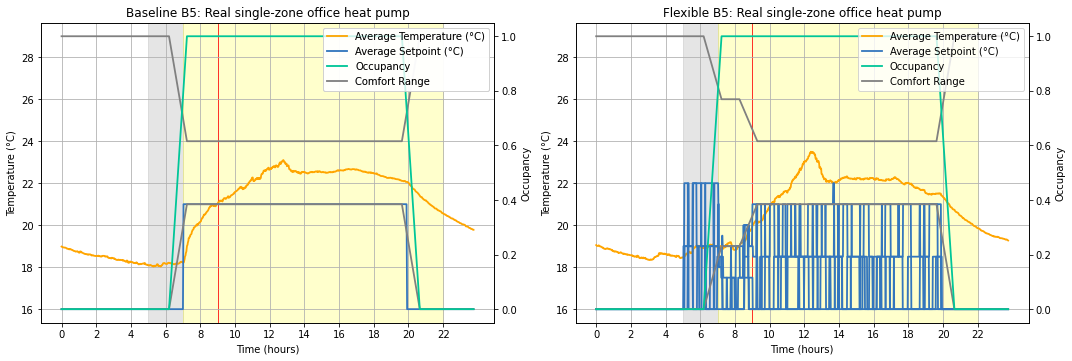

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your CSV file name and path
csv_file = '.csv'
df = pd.read_csv('tempData.csv', index_col='Time', parse_dates=True)
df_schedule_baseline = pd.read_csv('baseline_scheduleData.csv', index_col='Time', parse_dates=True)
df_schedule_flexible = pd.read_csv('flexible_scheduleData.csv', index_col='Time', parse_dates=True)

# Forward-fill missing values
df.ffill(inplace=True)
df.index = df.index + pd.Timedelta(hours=3)

fcu_temps_sum = 0
num_fcus = 5  # FCUs from 1 to 5

for fcu_num in range(1, num_fcus + 1):
    fcu_temp_day1 = df.loc['2023-03-17'][f'FCU {fcu_num} temperature'].values
    fcu_temp_day2 = df.loc['2023-03-21'][f'FCU {fcu_num} temperature'].values
    fcu_temps_sum += (fcu_temp_day1 + fcu_temp_day2) / 2
bs_temp = fcu_temps_sum / num_fcus

bs_setpoint = (df.loc['2023-03-17']['FCU 2 target temperature'].values + df.loc['2023-03-21']['FCU 2 target temperature'].values) / 2

fcu_temps_sum = 0
num_fcus = 5  # FCUs from 1 to 5

for fcu_num in range(1, num_fcus + 1):
    fcu_temp_day1 = df.loc['2023-03-16'][f'FCU {fcu_num} temperature'].values
    fcu_temp_day2 = df.loc['2023-03-22'][f'FCU {fcu_num} temperature'].values
    fcu_temps_sum += (fcu_temp_day1 + fcu_temp_day2) / 2
dr_temp = fcu_temps_sum / num_fcus

dr_setpoint1 = (df.loc['2023-03-16']['FCU 1 target temperature'].values + df.loc['2023-03-22']['FCU 1 target temperature'].values) / 2
dr_setpoint2 = (df.loc['2023-03-16']['FCU 2 target temperature'].values + df.loc['2023-03-22']['FCU 2 target temperature'].values) / 2
dr_setpoint3 = (df.loc['2023-03-16']['FCU 3 target temperature'].values + df.loc['2023-03-22']['FCU 3 target temperature'].values) / 2
dr_setpoint4 = (df.loc['2023-03-16']['FCU 4 target temperature'].values + df.loc['2023-03-22']['FCU 4 target temperature'].values) / 2
dr_setpoint5 = (df.loc['2023-03-16']['FCU 5 target temperature'].values + df.loc['2023-03-22']['FCU 5 target temperature'].values) / 2

# Create the plot for baseline and flexible control
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the average temperature for baseline

average_temperature_baseline, = ax1.plot(np.linspace(0, 23.75, 1440), bs_temp, label="Average Temperature (°C)", color='orange', linewidth=1.8)

average_setpoint_baseline, = ax1.plot(np.linspace(0, 23.75, 1440), bs_setpoint, label="Average Setpoint (°C)", color='#3376BD', linewidth=1.8)

lower_setpoint_baseline, = ax1.plot(np.linspace(0, 23.75, 24), df_schedule_baseline['LowerSetp'], 'gray',
                              linestyle='-', linewidth=1.8, label='Comfort Range')

upper_setpoint_baseline, = ax1.plot(np.linspace(0, 23.75, 24), df_schedule_baseline['UpperSetp'], 'gray',
                              linestyle='-', linewidth=1.8, label='')
ax_occ = ax1.twinx()
occupancy_line, = ax_occ.plot(np.linspace(0, 23.75, 24), df_schedule_baseline['Occupancy'], '#00c698',
                              linestyle='-', linewidth=1.8, label='Occupancy')
ax_occ.set_ylabel('Occupancy')

# Set the y-axis label for baseline
ax1.set_ylabel('Temperature (°C)')
ax1.set_xlabel('Time (hours)')

# Combine the legends
lines = [average_temperature_baseline, average_setpoint_baseline, occupancy_line, lower_setpoint_baseline, upper_setpoint_baseline]
labels = [line.get_label() for line in lines]

ax1.grid()

# Set the zorder of the ax_occ object to place it behind the legend
ax_occ.set_zorder(1)

ax_occ.legend(lines, labels, loc='upper right')

ax1.legend(lines, labels, loc='upper right')

custom_ticks = np.arange(0, 24, 2)  # Generate ticks from 0 to 24 with step 2
ax1.set_xticks(custom_ticks)

ax1.set_xticks(np.linspace(0, 23.75, 96)[::8])

ax1.set_title('Baseline B5: Real single-zone office heat pump')


average_temperature_flexible, = ax2.plot(np.linspace(0, 23.75, 1440), dr_temp, label="Average Temperature (°C)", color='orange', linewidth=1.8)

average_setpoint_flexible1, = ax2.plot(np.linspace(0, 23.75, 1440), dr_setpoint1, label="Average Setpoint HP1 (°C)", color='#3376BD', linewidth=1.8)

average_setpoint_flexible2, = ax2.plot(np.linspace(0, 23.75, 1440), dr_setpoint2, label="Average Setpoint HP2 (°C)", color='#3376BD', linewidth=1.8)

average_setpoint_flexible3, = ax2.plot(np.linspace(0, 23.75, 1440), dr_setpoint3, label="Average Setpoint HP3 (°C)", color='#3376BD', linewidth=1.8)

average_setpoint_flexible4, = ax2.plot(np.linspace(0, 23.75, 1440), dr_setpoint4, label="Average Setpoint HP4 (°C)", color='#3376BD', linewidth=1.8)

average_setpoint_flexible5, = ax2.plot(np.linspace(0, 23.75, 1440), dr_setpoint5, label="Average Setpoint HP5 (°C)", color='#3376BD', linewidth=1.8)

lower_setpoint_baseline, = ax2.plot(np.linspace(0, 23.75, 24), df_schedule_flexible['LowerSetp'], 'gray',
                              linestyle='-', linewidth=1.8, label='Adjusted Comfort range')

upper_setpoint_baseline, = ax2.plot(np.linspace(0, 23.75, 24), df_schedule_flexible['UpperSetp'], 'gray',
                              linestyle='-', linewidth=1.8, label='')

ax_occ = ax2.twinx()
occupancy_line, = ax_occ.plot(np.linspace(0, 23.75, 24), df_schedule_flexible['Occupancy'], '#00c698',
                              linestyle='-', linewidth=1.8, label='Occupancy')
ax_occ.set_ylabel('Occupancy')

# Set the zorder of the ax_occ object to place it behind the legend
ax_occ.set_zorder(1)

ax_occ.legend(lines, labels, loc='upper right')

# Set the y-axis label for flexible control
ax2.set_ylabel('Temperature (°C)')
ax2.set_xlabel('Time (hours)')

# Combine the legends
lines = [average_temperature_flexible, average_setpoint_flexible1, average_setpoint_flexible2, average_setpoint_flexible3, average_setpoint_flexible4, average_setpoint_flexible5,  occupancy_line]
labels = [line.get_label() for line in lines]

ax2.grid()


ax2.set_title('Flexible B5: Real single-zone office heat pump')

custom_ticks = np.arange(0, 24, 2)  # Generate ticks from 0 to 24 with step 2
ax2.set_xticks(custom_ticks)

# Adding a shaded area for shift on both subplots
ax1.axvspan(5, 7, alpha=0.2, color='gray')
ax2.axvspan(5, 7, alpha=0.2, color='gray')

# Adding a shaded area for shed on both subplots
ax1.axvspan(7, 22, alpha=0.2, color='yellow')
ax2.axvspan(7, 22, alpha=0.2, color='yellow')

# Adding a line for the 2 hours of shed constraint
ax1.axvspan(9, 9.01, alpha=0.8, color='red')
ax2.axvspan(9, 9.01, alpha=0.8, color='red')

ax2.set_xticks(np.linspace(0, 23.75, 96)[::8])

# Adding a comment with an arrow
ax1.annotate('Shed constraint', xy=(9, 0.95), xytext=(11.5, 0.82),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

ax2.annotate('Shed constraint', xy=(9, 0.95), xytext=(11.5, 0.82),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.tight_layout()  # Adjust the layout to prevent overlapping labels

plt.subplots_adjust(top=0.95)

plt.savefig('B5_temperature.png')

# Show the plot
plt.show()
